In [64]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sbn


# Think I need to predict for each individual stat, then produce a score from that for
# every player. This means that we need to create classifiers per statistic. Lots 
# more data needs to be pulled (how to predict passes, completions, td's, etc.)
def team_to_int_dict():
    teams = list(Game.objects.all().values_list('team', flat=True).distinct())
    return {team:teams.index(team) for team in teams}

team_id = team_to_int_dict()

def prep_pass_attempts(player_list):
    
    class_input = np.array([[player_stat.game.opponent_score,
                             player_stat.game.your_score,
                             team_id[player_stat.game.team],
                             player_stat.game.home] for player_stat in player_list])
    
    class_answer = np.array([player_stat.pass_attempts for player_stat in player_list])
    return class_input, class_answer

train_input, train_answer = prep_pass_attempts(PlayerData.objects.filter(game__week__lte=13))
test_input, test_answer = prep_pass_attempts(PlayerData.objects.filter(game__week=14))

113

In [65]:
train_input

array([[10, 44, 22,  1],
       [31, 38, 22,  0],
       [30, 42, 22,  0],
       ..., 
       [ 7, 38,  0,  1],
       [35, 21, 25,  1],
       [30, 38, 38,  0]])

In [66]:
# Random Forest Classifier
rfc = RandomForestClassifier ()
rfc.fit(train_input, train_answer)
predicted = rfc.predict(test_input)
accuracy_score(test_answer, predicted)

0.044247787610619468

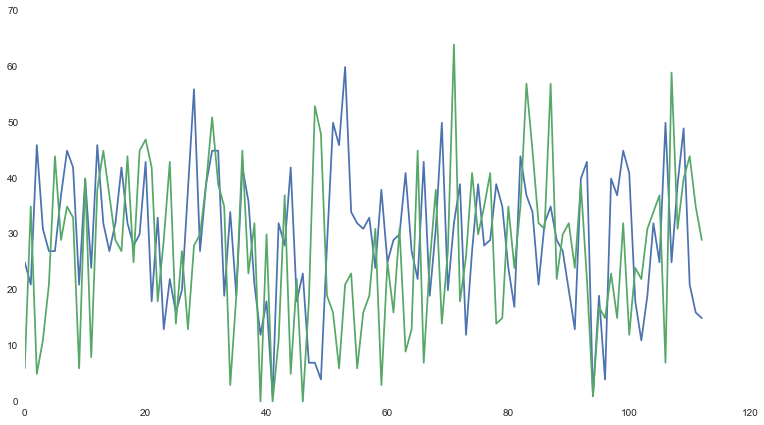

In [67]:
%matplotlib inline
plt.figure(figsize=(13,7))
plt.plot(test_answer)
plt.plot(predicted)